<h3>Import Library</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h3>Import Libraray and create a dataframe.</h3>

In [2]:
path = "http://bit.ly/w-data"
df = pd.read_csv(path)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Collecting basic information.

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Plotting scatter plot by Scores and Hours.

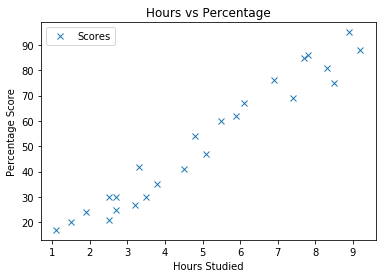

In [9]:
df.plot(x='Hours', y='Scores', style='x')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

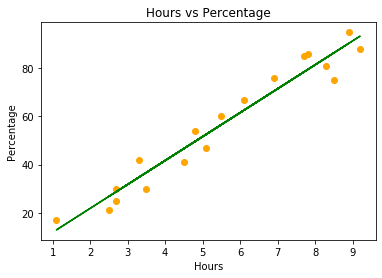

In [24]:
plt.scatter(X_train,y_train,color='orange')
plt.plot(X_train, regressor.predict(X_train),color='green')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [13]:
print(regressor.intercept_)

1.9322042531516601


In [14]:
print(regressor.coef_)

[9.94167834]


In [16]:
y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Predicted value by external input

In [42]:
hours = [[9.25]]
pred = float(regressor.predict(hours))
print("No of Hours = {}".format(hours))
print("Predicted Score={}".format(pred) )


No of Hours = [[9.25]]
Predicted Score=93.89272889341652


Display a Mean Absolute Error,Mean Squared Error and Root Mean Squared Error

In [27]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805
